In [1]:
import torch
import math

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

In [3]:
cifar_100 = math.pi * torch.tensor([1.0, 1.0, 0.8545, 1e-4, 0.0002, 0.9526])
cifar_10 = math.pi * torch.tensor([1.0, 0.6494, 0.98, 0.3624, 1.0, 1.0])
rot_mnist = math.pi * torch.tensor([1.0, 0.9997, 1.0, 0.9929, 1.0, 0.9989])
x_axis = torch.arange(cifar_100.shape[0])

/tmp/ipykernel_18681/1392227194.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(np.rint(den*x/number))


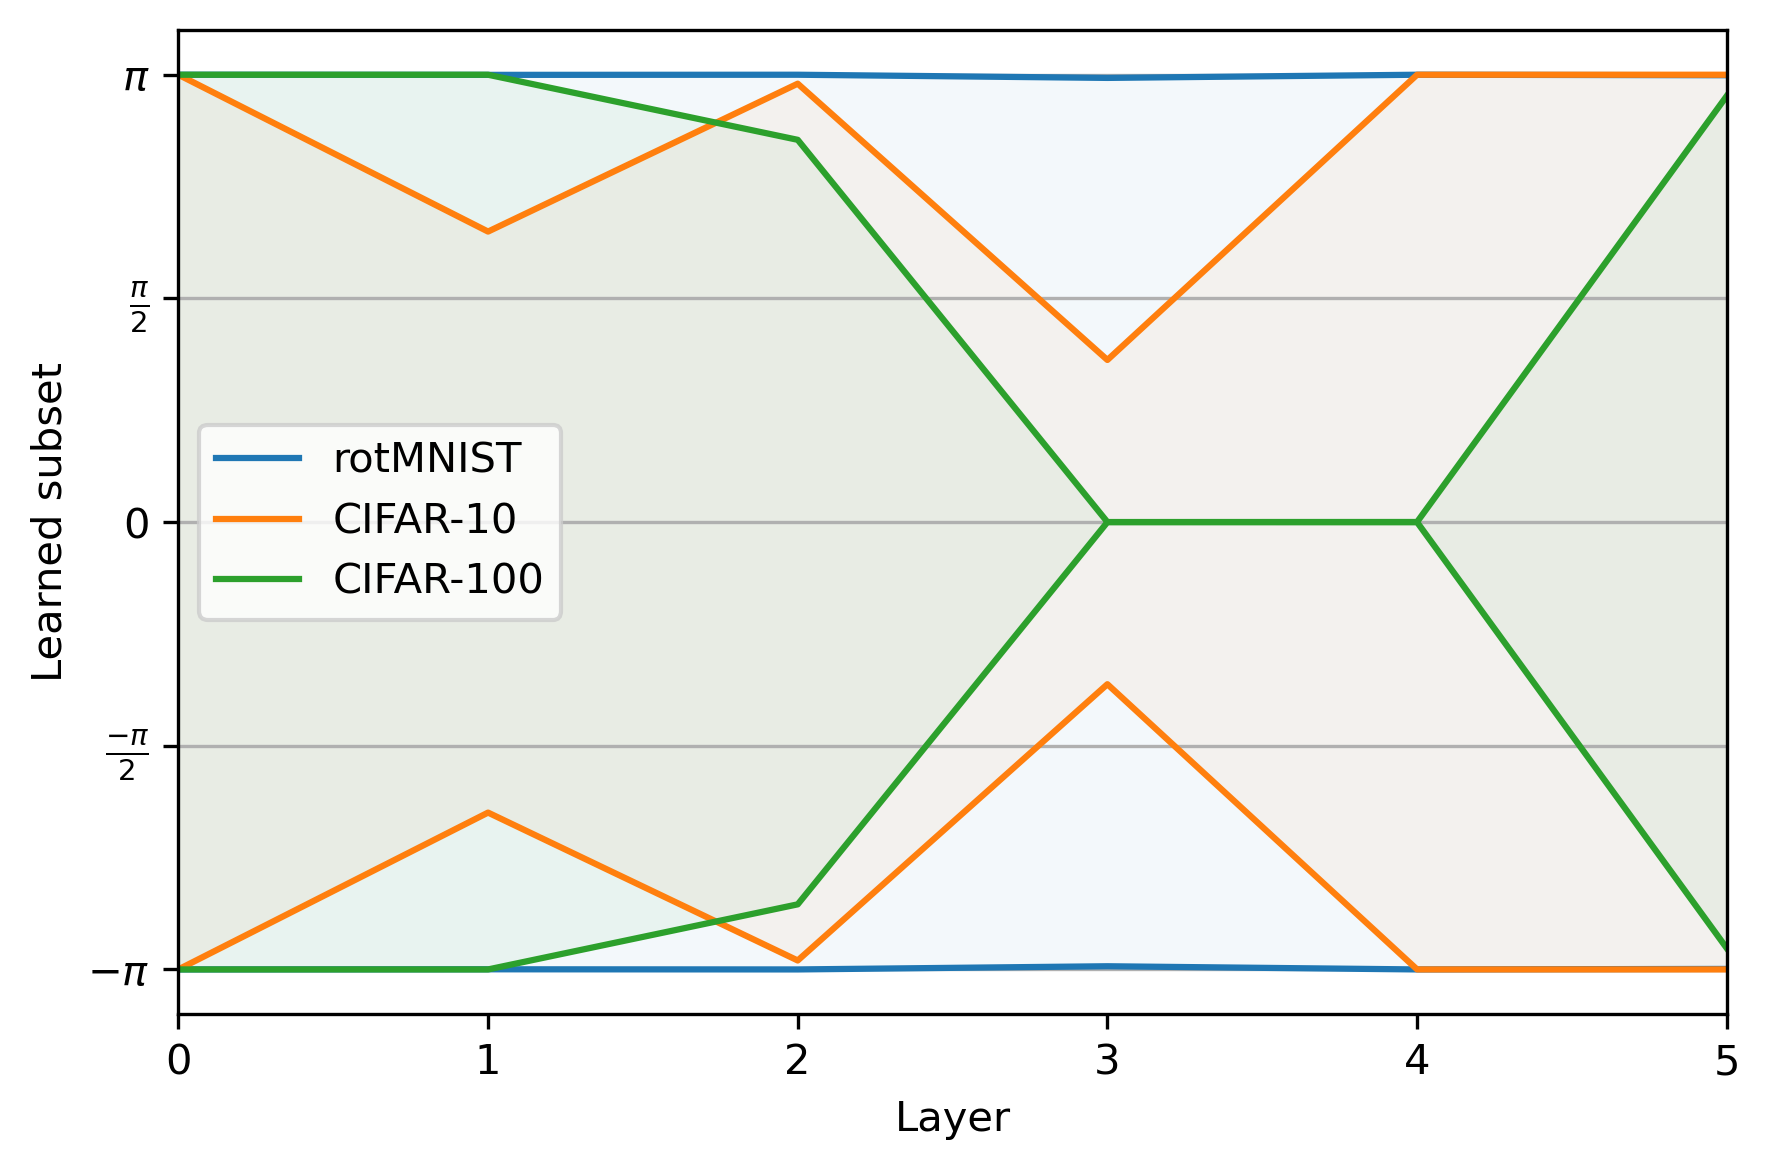

In [16]:
plt.figure(dpi=300)
ax = plt.gca()

color = next(ax._get_lines.prop_cycler)['color']
plt.plot(x_axis, rot_mnist, label='rotMNIST', color=color)
plt.plot(x_axis, -rot_mnist, color=color)
plt.fill_between(x_axis, rot_mnist, -rot_mnist, alpha=0.05)

color = next(ax._get_lines.prop_cycler)['color']
plt.plot(x_axis, cifar_10, label='CIFAR-10', color=color)
plt.plot(x_axis, -cifar_10, color=color)
plt.fill_between(x_axis, cifar_10, -cifar_10, alpha=0.05)

color = next(ax._get_lines.prop_cycler)['color']
plt.plot(cifar_100, label='CIFAR-100', color=color)
plt.plot(x_axis, -cifar_100, color=color)
plt.fill_between(x_axis, cifar_100, -cifar_100, alpha=0.05)

plt.grid('-.', axis='y')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(math.pi / 2))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.xlim([0, 5])


plt.ylabel('Learned subset')
plt.xlabel('Layer')
plt.legend()

plt.tight_layout()

plt.savefig('learned_subsets.png')
plt.show()